<a href="https://colab.research.google.com/github/Gilgamesh60/CartoonCharactersFaceRecognition/blob/main/Model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
import tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [ ]:
CATEGORIES=['ayanokoji_kiyotaka','rikka_takanashi','nami','emilia_re-zero','rimuru','senjogahara_hitagi','miku_nakano','lelouch_lamperouge','hayasaka_ai','marin_kitagawa']

In [ ]:
class_dict={}
count=0
for category in CATEGORIES:
  class_dict[category]=count
  count+=1
class_dict

{'ayanokoji_kiyotaka': 0,
 'rikka_takanashi': 1,
 'nami': 2,
 'emilia_re-zero': 3,
 'rimuru': 4,
 'senjogahara_hitagi': 5,
 'miku_nakano': 6,
 'lelouch_lamperouge': 7,
 'hayasaka_ai': 8,
 'marin_kitagawa': 9}

In [ ]:
data=[]
target=[]
for category in CATEGORIES:
  folder_path='/content/drive/MyDrive/cropped_images/'+category
  files=os.listdir(folder_path) 
  files=files[:50]
  for i in range(len(files)):
    path='/content/drive/MyDrive/cropped_images/'+category+'/'+files[i]
    img=cv2.imread(path)
    resized_img=cv2.resize(img,(100,100))
    data.append(resized_img)
    target.append(class_dict[category])
  files=[]

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],100,100,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [ ]:
new_target.shape

(481, 10)

In [ ]:
data.shape

(481, 100, 100, 3)

In [ ]:
data.shape[1:]

(100, 100, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()
model.add(Conv2D(481,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(10,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 481)       13468     
                                                                 
 activation (Activation)     (None, 98, 98, 481)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 481)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 100)       433000    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                    

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [ ]:
train_data.shape

(384, 100, 100, 3)

In [ ]:
train_target.shape

(384, 10)

In [ ]:
history=model.fit(train_data,train_target,epochs=15,validation_split=0.2)

Epoch 1/15
10/10 [==============================] - 93s 9s/step - loss: 2.4099 - accuracy: 0.1010 - val_loss: 2.2815 - val_accuracy: 0.1558
Epoch 2/15
10/10 [==============================] - 69s 7s/step - loss: 2.2516 - accuracy: 0.1368 - val_loss: 2.1544 - val_accuracy: 0.1558
Epoch 3/15
10/10 [==============================] - 67s 7s/step - loss: 2.1018 - accuracy: 0.2345 - val_loss: 1.9823 - val_accuracy: 0.2857
Epoch 4/15
10/10 [==============================] - 70s 7s/step - loss: 1.8502 - accuracy: 0.3550 - val_loss: 1.6619 - val_accuracy: 0.3636
Epoch 5/15
10/10 [==============================] - 72s 7s/step - loss: 1.6030 - accuracy: 0.4039 - val_loss: 1.3699 - val_accuracy: 0.5325
Epoch 6/15
10/10 [==============================] - 67s 7s/step - loss: 1.2807 - accuracy: 0.5472 - val_loss: 1.1957 - val_accuracy: 0.6753
Epoch 7/15
10/10 [==============================] - 70s 7s/step - loss: 1.0351 - accuracy: 0.6189 - val_loss: 1.0059 - val_accuracy: 0.7013
Epoch 8/15
10/10 [==

In [ ]:
model.save('model.h5')

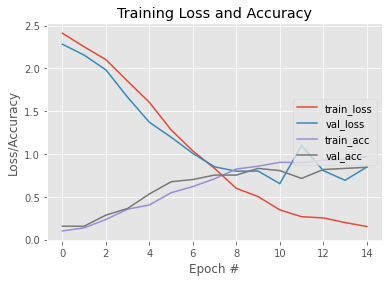

In [ ]:
N = 15
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [ ]:
model.evaluate(test_data,test_target)

4/4 [==============================] - 6s 1s/step - loss: 0.5099 - accuracy: 0.8660


[0.509861946105957, 0.8659793734550476]